# Getting to know the data:
venv_scientific - The virtualenv with pandas, numpy, scipy, matplotlib, 

In [1]:
import pandas as pd
import numpy as np

In [2]:
from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf8"))

kickstarter_projects.csv
kickstarter_projects_proper.csv
new_dataset.csv
samplesubmission.csv
test.csv
train.csv
train_new.csv
train_new_innerjoin.csv
train_new_leftjoin.csv
train_ready.csv



train.csv, test.csv and sample_submission.csv The train data consists of sample projects from the May 2009 to May 2015. The test data consists of projects from June 2015 to March 2017.

In [3]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [4]:
train_data.shape

(108129, 14)

In [5]:
test_data.shape

(63465, 12)

In [9]:
train_data.describe()

,goal,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,std_goal
count,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,108129.000000,108129.000000,108129.000000
mean,3.672623e+04,1.380248e+09,1.380153e+09,1.374037e+09,1.377299e+09,123.516661,0.319627,0.000367
std,9.719027e+05,4.270222e+07,4.266402e+07,4.272310e+07,4.294421e+07,1176.745162,0.466334,0.009719
min,1.000000e-02,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000,0.000000,0.000000
25%,2.000000e+03,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,2.000000,0.000000,0.000020
50%,5.000000e+03,1.393628e+09,1.393567e+09,1.384445e+09,1.390870e+09,17.000000,0.000000,0.000050
75%,1.300000e+04,1.415719e+09,1.415548e+09,1.409623e+09,1.412807e+09,65.000000,1.000000,0.000130
max,1.000000e+08,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,219382.000000,1.000000,1.000000


In [10]:
test_data.describe()

,goal,deadline,state_changed_at,created_at,launched_at
count,6.346500e+04,6.346500e+04,6.346500e+04,6.346500e+04,6.346500e+04
mean,3.532372e+04,1.459009e+09,1.458278e+09,1.451771e+09,1.456135e+09
std,1.206678e+06,1.638850e+07,1.571211e+07,1.983827e+07,1.641921e+07
min,1.000000e+00,1.433117e+09,1.428069e+09,1.266343e+09,1.427940e+09
25%,2.000000e+03,1.444522e+09,1.444419e+09,1.438098e+09,1.441756e+09
50%,6.000000e+03,1.458415e+09,1.458254e+09,1.452243e+09,1.455635e+09
75%,2.000000e+04,1.472587e+09,1.470672e+09,1.466366e+09,1.469650e+09
max,1.000000e+08,1.490916e+09,1.490915e+09,1.490228e+09,1.490297e+09


In [11]:
train_data.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,std_goal
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1,1.999000e-07
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0,2.999900e-06


In [13]:
test_data.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,1449619185,1449619185,1446002581,1446159585
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,1453435620,1453435620,1450297323,1450411620


# final_status:
whether the project was successful or not 
1 -> success
0 -> failed

In [8]:
print(train_data['final_status'].value_counts())


0    73568
1    34561
Name: final_status, dtype: int64


In [9]:
100 * train_data.final_status.value_counts()/len(train_data.final_status)

0    68.037252
1    31.962748
Name: final_status, dtype: float64

# goal - 
the goal (amount) required for the project.
0.01 to 100,000,000 asked.
Mean - $ 36726

Successful projects mean - below 10,000 - <b>9806</b>
Failed projects mean - is nearly 50,000 - <b>49372.5889115</b>

In [16]:
pd.set_option('display.max_colwidth', 100)

In [17]:
print(train_data['goal'].idxmax())  # index of max
print(train_data['goal'].max()) # max value for the column
train_data.index  # data index


65916
100000000.0


RangeIndex(start=0, stop=108129, step=1)

In [18]:
print(train_data['goal'].idxmin())  # index of min
print(train_data['goal'].min())

317
0.01


In [6]:
from sklearn import preprocessing

# x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
goal_scaled = min_max_scaler.fit_transform(train_data.goal)

/home/nahmed/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/nahmed/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [7]:
print(goal_scaled.min())
print(goal_scaled.max())
print(goal_scaled.mean())

0.0
1.0
0.000367262188363


In [8]:
# train_data.index.tolist()  # get the DataFrame index as a list.
train_data['std_goal'] = goal_scaled

In [20]:
train_data.index.get_values()  # a better and new approach


array([     0,      1,      2, ..., 108126, 108127, 108128])

In [21]:
print(train_data['goal'].mean())  # average/mean of the column

36726.2288326


In [146]:
print(train_data.goal[train_data.final_status == 1].mean())  # average/mean of successful projects

9806.65421718


In [13]:
print(train_data.goal[train_data.final_status == 0].mean())  # average/mean of failed projects

49372.5889115


In [12]:
train_data.groupby('final_status')['goal'].median()

final_status
0    5400.0
1    3050.0
Name: goal, dtype: float64

# disable_communication - 
whether the project authors has disabled communication option with people donating to the project

In [24]:
print(train_data['disable_communication'].value_counts())


False    107806
True        323
Name: disable_communication, dtype: int64


In [25]:
print(100 * train_data['disable_communication'].value_counts()) / len(train_data.disable_communication)


False    99.701283
True      0.298717
Name: disable_communication, dtype: float64


In [26]:
print(train_data['disable_communication'][train_data['final_status'] == 1].value_counts())


False    34561
Name: disable_communication, dtype: int64


In [27]:
print(train_data['disable_communication'][train_data.final_status == 0].value_counts())


False    73245
True       323
Name: disable_communication, dtype: int64


A rather insignificant feature - as <b>99.7%</b> have <b>it False</b>

# duration:
A new feature, stating project duration in terms of days it was opne/active

In [21]:
# processing the UNIX timestamps into readable dates:
cols = ['state_changed_at','created_at','launched_at','deadline']
for col in cols:
    train_data['%s' % col] = pd.to_datetime(train_data['%s' % col], unit='s')

In [22]:
train_data.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,std_goal
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1,1.999000e-07
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,2,0,2.999900e-06


In [23]:
# dt - only work for datetime series - TypeError if the Series does not contain datetimelike values.
train_data['project_duration'] = (train_data.deadline - train_data.launched_at).dt.days

In [24]:
train_data.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,std_goal,project_duration
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1,1.999000e-07,8
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,2,0,2.999900e-06,16


In [134]:
# train_data.project_duration.value_counts()

                                    

In [26]:
print(train_data.project_duration.mean())
print(train_data.project_duration.min())
print(train_data.project_duration.max())


33.9170342831
1
91


In [27]:
print(train_data.project_duration[train_data.final_status == 1].mean())
print(train_data.project_duration[train_data.final_status == 0].mean())


32.1244755649
34.7591479991


Not much significant - as overall mean (average days) is <b>34</b> days, while for successful projects it is <b>32</b> and failed it is <b>34</b>

# creation_to_launch:
a new feature to get the difference between creation and launch dates.

In [28]:
train_data['creation_to_launch'] = (train_data.launched_at - train_data.created_at).dt.days

In [29]:
train_data.head(3)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,std_goal,project_duration,creation_to_launch
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1,1.999000e-07,8,0
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,2,0,2.999900e-06,16,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,2009-05-22 21:26:00,2009-05-22 21:30:18,2009-05-12 21:26:53,2009-05-12 21:39:58,0,0,2.999000e-07,9,0


In [33]:
print(train_data.creation_to_launch.mean())
print(train_data.creation_to_launch[train_data.final_status == 1].mean())
print(train_data.creation_to_launch[train_data.final_status == 0].mean())
print(train_data.creation_to_launch.max())
print(train_data.creation_to_launch.min())

37.2734049145
41.4838112323
35.2954273597
1903
0


Can be a helpful feature - as there's on average a week's difference between successful and failed projects.

# launch_to_statechanged:
new feature based on the difference between launched_at and state_changed attribute.

In [42]:
train_data['launch_to_statechanged'] = (train_data.state_changed_at - train_data.launched_at).dt.days

In [53]:
train_data.head(2)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,project_duration,creation_to_launch,launch_to_statechanged
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them too. so i thought i would suggest something for m...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1,8,0,8
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in Residence in Kankakee Illinois,"I, Dereck Blackburn will be taking upon an incredible journey in the month of May 2009. I will b...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-residence-in-kankakee-illinois,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,2,0,16,0,16


In [34]:
# (train_data.project_duration - train_data.launch_to_statechanged).value_counts()


# backers_count:
problem with this feature is, it's missing in test data.

In [35]:
print(train_data.backers_count.max())
print(train_data.backers_count.min())
print(train_data.backers_count.mean())
print(train_data.backers_count[train_data.final_status == 1].mean())  # average backers for successful projects
print(train_data.backers_count[train_data.final_status == 0].mean())  # average backers for failed projects


219382
0
123.516660655
323.981800295
29.3415343628


For non-Gaussian features, perform some transformation (log transform; square root; power transform), it may come up as a bell-curve distribution

In [167]:
train_data.drop('goal_log', axis=1, inplace=True)  # without inplae=True didn't drop it permanently
train_data.insert(5, 'goal_log', 0.0)


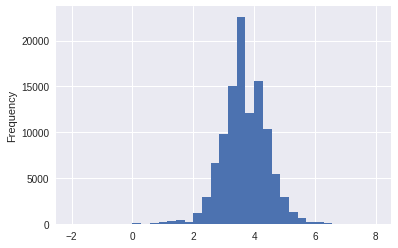

In [20]:

# train_data['goal_log'] = np.log10(train_data.goal)
np.log10(train_data.goal).plot.hist(bins = 35)
# sns.lmplot(x = 'goal_log', y = 'backers_count', col ='final_status', data = train_data, fit_reg = False)

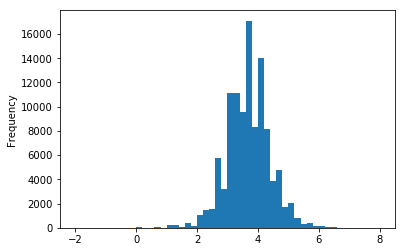

In [152]:
np.log10(train_data.goal).plot.hist(bins = 50)

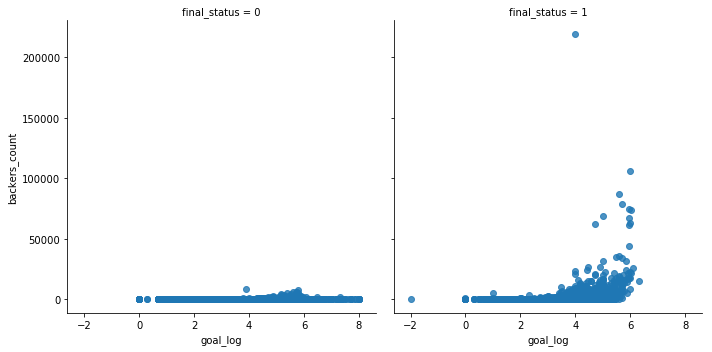

In [169]:
train_data['goal_log'] = np.log10(train_data.goal) 
sns.lmplot(x = 'goal_log', y = 'backers_count', col ='final_status', data = train_data, fit_reg = False)

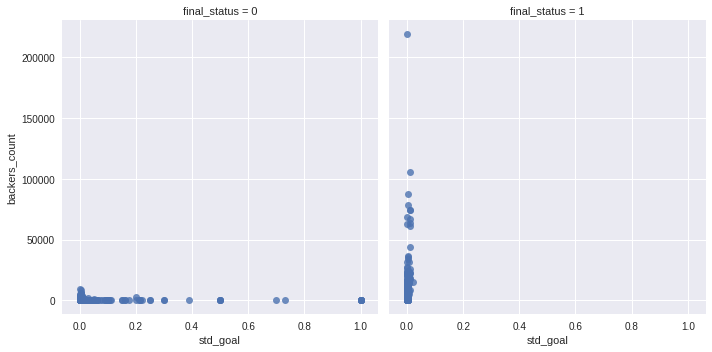

In [30]:
sns.lmplot(x = 'std_goal', y = 'backers_count', col ='final_status', data = train_data, fit_reg = False)

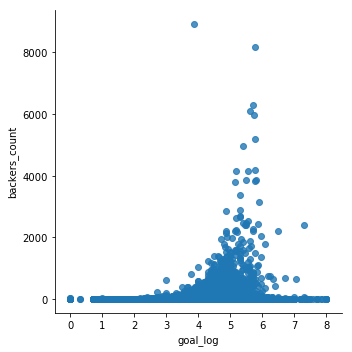

In [163]:
# scatter plot for failed projects - using log 10 of goal
sns.lmplot(x = 'goal_log', y = 'backers_count', data = train_data[train_data.final_status==0], fit_reg = False)

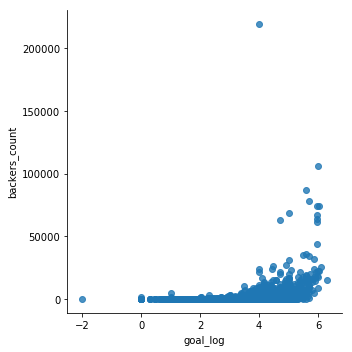

In [164]:
# scatter plot for successful projects - using log 10 of goal
sns.lmplot(x = 'goal_log', y = 'backers_count', data = train_data[train_data.final_status==1], fit_reg = False)

In [170]:
train_data.head(2)

,project_id,name,desc,description_size,goal,goal_log,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,project_duration,creation_to_launch,launch_to_statechanged
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them too. so i thought i would suggest something for m...,134.0,20.0,1.301030,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1,8,0,8
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in Residence in Kankakee Illinois,"I, Dereck Blackburn will be taking upon an incredible journey in the month of May 2009. I will b...",137.0,300.0,2.477121,sponsor-dereck-blackburn-lostwars-artist-in-residence-in-kankakee-illinois,False,US,USD,2009-05-15 23:10:00,2009-05-16 00:00:18,2009-04-28 23:10:24,2009-04-29 03:26:32,2,0,16,0,16


Huge - difference, 
NO backers_count for test data - ...


 # description_size:
 size of the description string - alphabet count - can think over to make it better, if find any significance

In [36]:
# train_data.insert(3, 'description_size', len(train_data.desc))
# train_data.columns.drop('description_size')   just printed the index list 
# train_data.drop('description_size', axis=1, inplace=True)  # without inplae=True didn't drop it permanently
train_data.insert(3, 'description_size', len(train_data.desc))

In [37]:
# train_data["description_size"] = train_data.apply(lambda x: train_data.desc, axis=1)
train_data.description_size = train_data.desc.str.len()

In [38]:
train_data.head(1)



,project_id,name,desc,description_size,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,std_goal,project_duration,creation_to_launch
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,134.0,20.0,drawing-for-dollars,False,US,USD,2009-05-03 06:59:59,2009-05-03 07:00:17,2009-04-24 19:15:07,2009-04-24 19:52:03,3,1,1.999000e-07,8,0


In [39]:
print(train_data.description_size.mean())
print(train_data.description_size[train_data.final_status ==1].mean())
print(train_data.description_size[train_data.final_status ==0].mean())

134.105502169
135.11339371
133.631960305


Completely insignificant - as no much difference in failed and successful projects' avergae descritpion size

# Saving the new DataFrame

In [40]:
train_data.to_csv('data/train_new.csv', index=False)  # index=False otherwise adds 'Unnamed' index

# Extended data - description 

In [41]:
train_data.describe('goal')


,description_size,goal,backers_count,final_status,std_goal,project_duration,creation_to_launch
count,108121.000000,1.081290e+05,108129.000000,108129.000000,108129.000000,108129.000000,108129.000000
mean,134.105502,3.672623e+04,123.516661,0.319627,0.000367,33.917034,37.273405
std,79.376798,9.719027e+05,1176.745162,0.466334,0.009719,12.936361,87.148811
min,1.000000,1.000000e-02,0.000000,0.000000,0.000000,1.000000,0.000000
25%,107.000000,2.000000e+03,2.000000,0.000000,0.000020,30.000000,3.000000
50%,126.000000,5.000000e+03,17.000000,0.000000,0.000050,30.000000,10.000000
75%,133.000000,1.300000e+04,65.000000,1.000000,0.000130,36.000000,32.000000
max,1268.000000,1.000000e+08,219382.000000,1.000000,1.000000,91.000000,1903.000000


 # Correlation analysis 

In [19]:
import seaborn as sns


In [15]:
%matplotlib inline

# final_status

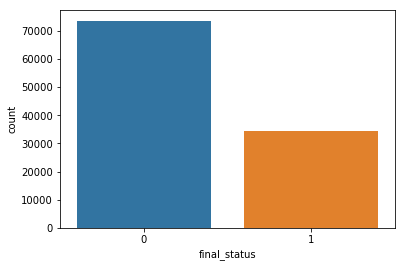

In [110]:
sns.countplot(x='final_status',data=train_data)

# backers_count

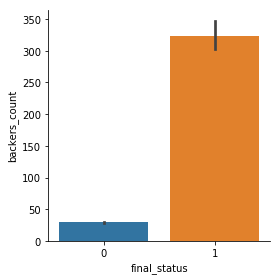

In [118]:
sns.factorplot(x='final_status', y='backers_count', data=train_data, kind='bar')

In [ ]:
sns.lmplot(x = 'loggoal', y = 'backers_count', col ='final_status', data = train_data, fit_reg = False)

# goal

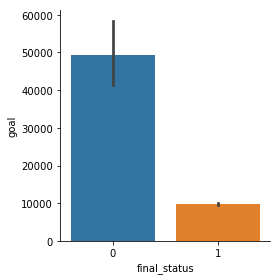

In [119]:
sns.factorplot(x='final_status', y='goal', data=train_data, kind='bar')

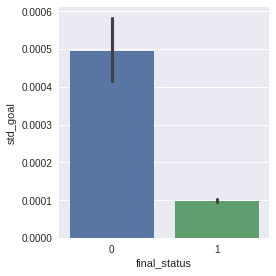

In [20]:
sns.factorplot(x='final_status', y='std_goal', data=train_data, kind='bar')

In [ ]:
#train_data.std_goal.plot.hist(bins = 10)
# sns.lmplot(x = 'goal', y = 'backers_count', data = train_data[train_data.final_status==1], fit_reg = False)
# sns.lmplot(x = 'std_goal', y = 'backers_count', data = train_data[train_data.final_status==1], fit_reg = False)


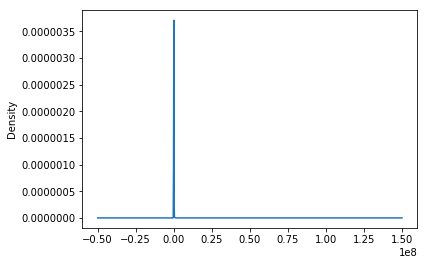

In [16]:
train_data.goal.plot.kde()

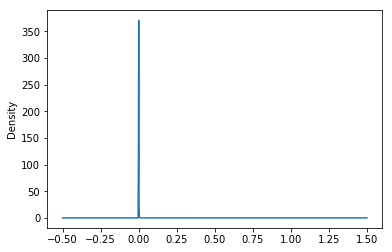

In [17]:
train_data.std_goal.plot.kde()

# country

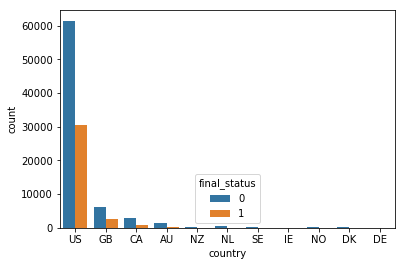

In [120]:
sns.countplot(x='country',data=train_data, hue='final_status')

# project_duration

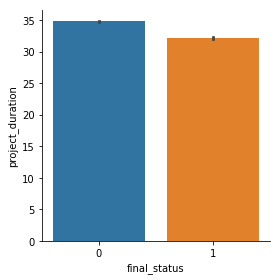

In [128]:
# sns.countplot(x='project_duration',data=train_data, hue='final_status')
sns.factorplot(x='final_status', y='project_duration',data=train_data, kind='bar')

# creation_to_launch

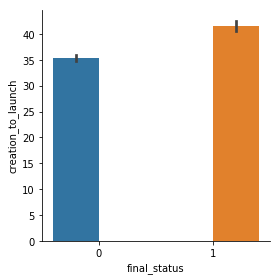

In [132]:
sns.factorplot(x='final_status', y='creation_to_launch',data=train_data, kind='bar')